Assignment 2: Regression and Classification Models 
Note on use of AI: I used ChatGPT to help organize my workflow, and give me an overview of the order of the steps I should do for this assignment to make sure everything works correctly. I also used it to help me debug errors that popped up. One recurring error I kept encountering was being unable to find the CSV file no matter what file pathway I provided. I also used it to explain classroom concepts to me in a more simplified manner. i.e "Explain logistic regression to me as if I was 10 years old" or "Explain to me what an R^2 value means in simple language"

In [ ]:
#Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    r2_score, mean_squared_error,
    accuracy_score, f1_score,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve)

In [ ]:
#Read CSV data file
df = pd.read_csv('../Data/heart_disease_uci.csv')
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
#Part 1: Regression model to predict cholesterol levels
#Step 1: Prepare data
df = df.fillna(df.mean(numeric_only=True))
X_reg = df.drop(columns=['chol', 'num'])
X_reg = pd.get_dummies(X_reg, drop_first=True)
y_reg = df['chol']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)



In [18]:
#Step 2: Train model and evaluate
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.201
RMSE: 97.15


c:\Users\ahmed\Documents\School\BINF 5507 Machine learning\.pixi\envs\default\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


c:\Users\ahmed\Documents\School\BINF 5507 Machine learning\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.879e+06, tolerance: 8.729e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\ahmed\Documents\School\BINF 5507 Machine learning\.pixi\envs\default\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ahmed\Documents\School\BINF 5507 Machine learning\.pixi\envs\default\Lib\site-package

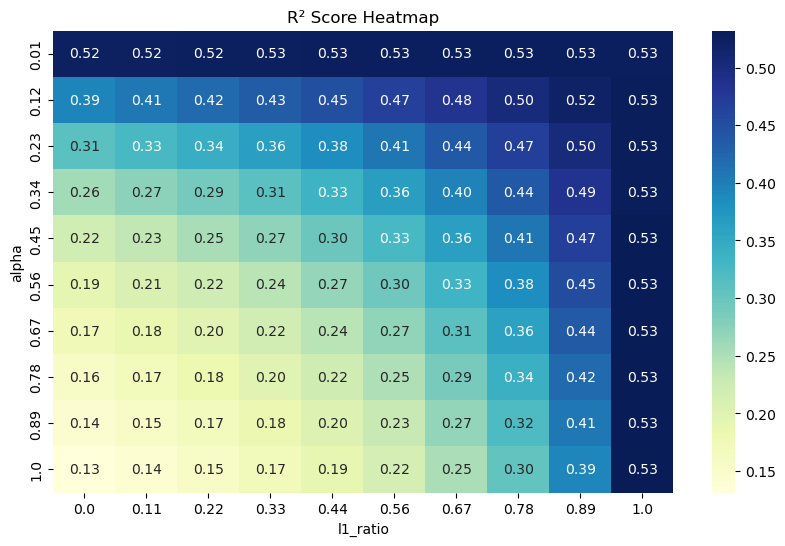

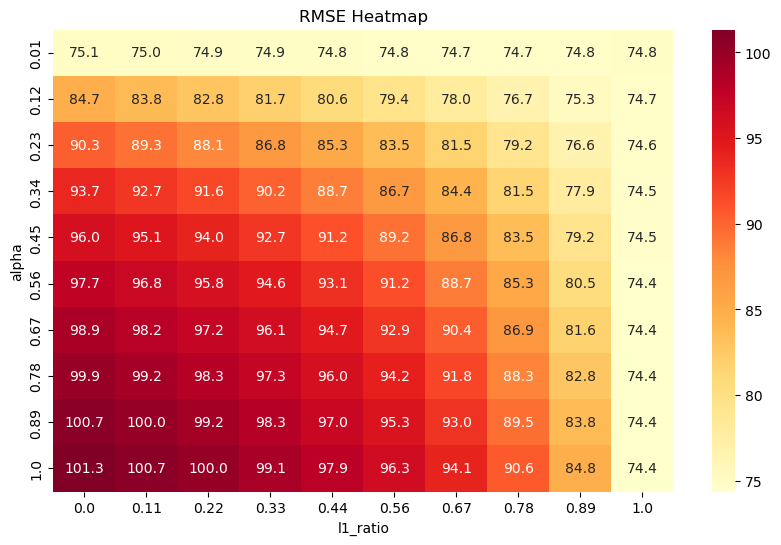

In [19]:
#Step 3: Hyperparameters
import numpy as np
alphas = np.linspace(0.01, 1.0, 10)
l1_ratios = np.linspace(0.0, 1.0, 10)
r2_matrix = np.zeros((len(alphas), len(l1_ratios)))
rmse_matrix = np.zeros((len(alphas), len(l1_ratios)))
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
for i, alpha in enumerate(alphas):
    for j, l1 in enumerate(l1_ratios):
        model = ElasticNet(alpha=alpha, l1_ratio=l1, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_matrix[i, j] = r2_score(y_test, y_pred)
        rmse_matrix[i, j] = mean_squared_error(y_test, y_pred, squared=False)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(r2_matrix, annot=True, fmt=".2f", xticklabels=np.round(l1_ratios, 2),
            yticklabels=np.round(alphas, 2), cmap="YlGnBu")
plt.title("R² Score Heatmap")
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(rmse_matrix, annot=True, fmt=".1f", xticklabels=np.round(l1_ratios, 2),
            yticklabels=np.round(alphas, 2), cmap="YlOrRd")
plt.title("RMSE Heatmap")
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.show()

In [ ]:
#Final model with optimized hyperparameters
final_model = ElasticNet(alpha=0.78, l1_ratio=1.0, random_state=42)
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_test)
final_r2 = r2_score(y_test, final_preds)
final_rmse = mean_squared_error(y_test, final_preds, squared=False)
print(f"Final R²: {final_r2:.3f}")
print(f"Final RMSE: {final_rmse:.2f}")

Final R²: 0.532
Final RMSE: 74.38


c:\Users\ahmed\Documents\School\BINF 5507 Machine learning\.pixi\envs\default\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#Part 2a: Classification models - Logistic Regression
#Step 1: Train model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
X_cls = df.drop(columns=['chol', 'num'])
X_cls = pd.get_dummies(X_cls, drop_first=True)
y_cls = df['num']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42)
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_c, y_train_c)
y_pred_log = log_model.predict(X_test_c)
y_proba_log = log_model.predict_proba(X_test_c)[:, 1]
log_accuracy = accuracy_score(y_test_c, y_pred_log)
log_f1 = f1_score(y_test_c, y_pred_log)
log_auroc = roc_auc_score(y_test_c, y_proba_log)
log_auprc = average_precision_score(y_test_c, y_proba_log)
print(f"Accuracy: {log_accuracy:.3f}")
print(f"F1 Score: {log_f1:.3f}")
print(f"AUROC: {log_auroc:.3f}")
print(f"AUPRC: {log_auprc:.3f}")


Accuracy: 0.815
F1 Score: 0.840
AUROC: 0.910
AUPRC: 0.931


In [ ]:
#Step 2: Hyperparameter tuning for logistic regression
penalties = ['none', 'l2', 'l1', 'elasticnet']
solvers = ['lbfgs', 'liblinear', 'saga', 'newton-cg']
results = []
for penalty in penalties:
    for solver in solvers:
        if penalty == 'l1' and solver not in ['liblinear', 'saga']:
            continue
        if penalty == 'elasticnet' and solver != 'saga':
            continue
        if penalty == 'none' and solver not in ['lbfgs', 'saga']:
            continue

        try:
            model = LogisticRegression(
                penalty=penalty,
                solver=solver,
                l1_ratio=0.5 if penalty == 'elasticnet' else None,
                max_iter=1000,
                random_state=42)
            model.fit(X_train_c, y_train_c)
            y_pred = model.predict(X_test_c)
            y_proba = model.predict_proba(X_test_c)[:, 1]

            acc = accuracy_score(y_test_c, y_pred)
            f1 = f1_score(y_test_c, y_pred)
            auroc = roc_auc_score(y_test_c, y_proba)
            auprc = average_precision_score(y_test_c, y_proba)

            results.append({
                'penalty': penalty,
                'solver': solver,
                'accuracy': acc,
                'f1_score': f1,
                'auroc': auroc,
                'auprc': auprc})

        except Exception as e:
            print(f"Skipped combo: penalty={penalty}, solver={solver} — error: {e}")
import pandas as pd
results_df = pd.DataFrame(results)
results_df.sort_values(by='auroc', ascending=False).reset_index(drop=True)

            

Skipped combo: penalty=none, solver=lbfgs — error: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Skipped combo: penalty=none, solver=saga — error: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.


c:\Users\ahmed\Documents\School\BINF 5507 Machine learning\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ahmed\Documents\School\BINF 5507 Machine learning\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ahmed\Documents\School\BINF 5507 Machine learning\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,solver,accuracy,f1_score,auroc,auprc
0,l1,liblinear,0.826087,0.847619,0.909969,0.930346
1,l2,lbfgs,0.815217,0.839623,0.909725,0.930992
2,l2,newton-cg,0.820652,0.845070,0.909358,0.930441
3,l2,liblinear,0.826087,0.849057,0.908502,0.928455
4,l2,saga,0.847826,0.870370,0.901040,0.921805
5,elasticnet,saga,0.847826,0.870370,0.900673,0.921542
6,l1,saga,0.847826,0.870370,0.900061,0.921069


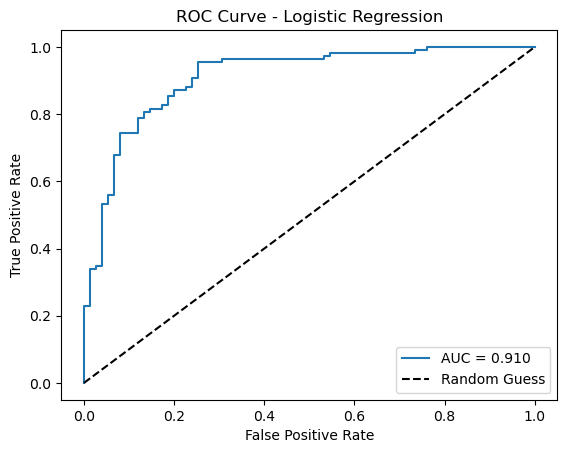

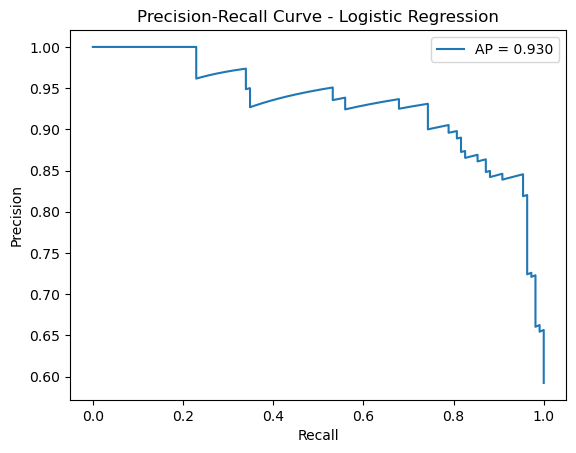

In [31]:
#Step 3: Retraining logistic regression model using best hyperparameter settings
final_log_model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=1000,
    random_state=42)
final_log_model.fit(X_train_c, y_train_c)
y_pred_final_log = final_log_model.predict(X_test_c)
y_proba_final_log = final_log_model.predict_proba(X_test_c)[:, 1]

#Step 3a: Plot AUROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test_c, y_proba_final_log)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test_c, y_proba_final_log):.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

#Step 3b: Plot AUPRC curve
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_test_c, y_proba_final_log)
plt.figure()
plt.plot(recall, precision, label=f'AP = {average_precision_score(y_test_c, y_proba_final_log):.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend()
plt.show()


In [ ]:
#Part 2b: k-NN classifiers
#Step 1: Train and evaluate k-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score
k_values = [1, 5, 10]
knn_results = []

k_values = [1, 5, 10]
knn_results = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_c, y_train_c)
    y_pred = knn_model.predict(X_test_c)
    y_proba = knn_model.predict_proba(X_test_c)[:, 1]

    acc = accuracy_score(y_test_c, y_pred)
    f1 = f1_score(y_test_c, y_pred)
    auroc = roc_auc_score(y_test_c, y_proba)
    auprc = average_precision_score(y_test_c, y_proba)

    knn_results.append({
        'k': k,
        'accuracy': acc,
        'f1_score': f1,
        'auroc': auroc,
        'auprc': auprc})
    
import pandas as pd
knn_df = pd.DataFrame(knn_results)
knn_df.sort_values(by='auroc', ascending=False).reset_index(drop=True)

# k = 5 gives the best result across all metrics, so I will use this one moving forward

,k,accuracy,f1_score,auroc,auprc
0,5,0.701087,0.734300,0.733578,0.757728
1,10,0.679348,0.723005,0.725382,0.753843
2,1,0.592391,0.611399,0.603976,0.651927


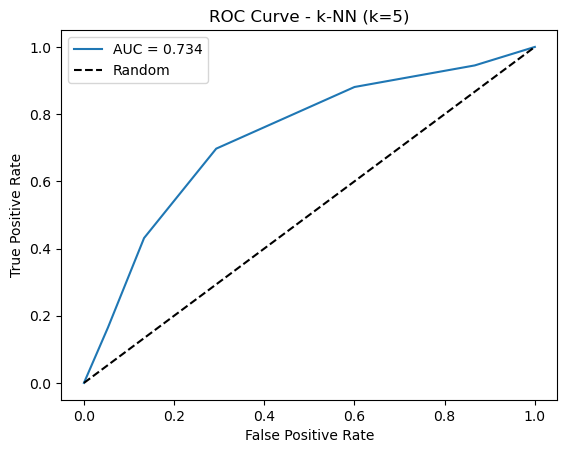

In [33]:
#Step 2a: Plot AUROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train_c, y_train_c)
knn_proba = best_knn.predict_proba(X_test_c)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test_c, knn_proba)
plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f'AUC = {roc_auc_score(y_test_c, knn_proba):.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - k-NN (k=5)")
plt.legend()
plt.show()


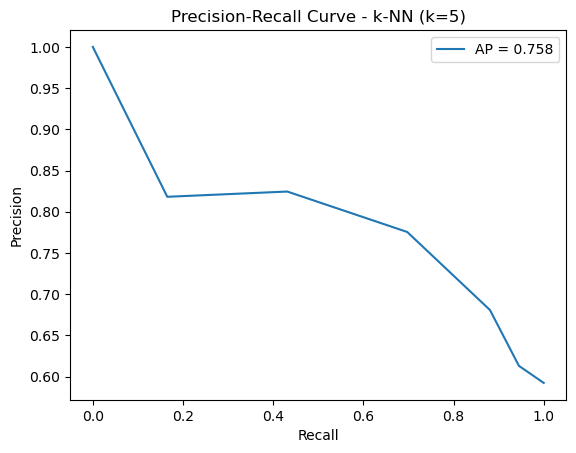

In [34]:
#Step 2b: Plot AUPRC curve
from sklearn.metrics import precision_recall_curve, average_precision_score
precision_knn, recall_knn, _ = precision_recall_curve(y_test_c, knn_proba)
plt.figure()
plt.plot(recall_knn, precision_knn, label=f'AP = {average_precision_score(y_test_c, knn_proba):.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - k-NN (k=5)")
plt.legend()
plt.show()